In [35]:
import pandas as pd
data_frame = pd.read_csv('data.csv')
data_frame.shape

(18207, 89)

In [36]:
data_frame.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [37]:
data_frame.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '€165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '€143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '€165K']],
      dtype=object)

In [39]:
df1 = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
    return 1000.0
    
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
        
wage = df1['Wage'].replace('[\€]', '', regex=True).apply(value_to_float)
value = df1['Value'].replace('[\€]', '', regex=True).apply(value_to_float)

df1['Wage'] = wage
df1['Value'] = value


df1['difference'] = df1['Value'] - df1['Wage']
df1.sort_values('difference', ascending=False)

,Name,Wage,Value,difference
9294,R. Vodišek,1000.0,975000.0,974000.0
8090,J. Roa,1000.0,975000.0,974000.0
9706,I. Lapshov,1000.0,975000.0,974000.0
5552,C. Nhamoinesu,1000.0,975000.0,974000.0
9537,M. Pulkrab,1000.0,975000.0,974000.0
...,...,...,...,...
8,Sergio Ramos,380000.0,1000.0,-379000.0
1,Cristiano Ronaldo,405000.0,1000.0,-404000.0
6,L. Modrić,420000.0,1000.0,-419000.0
7,L. Suárez,455000.0,1000.0,-454000.0


<AxesSubplot:xlabel='Wage', ylabel='Value'>

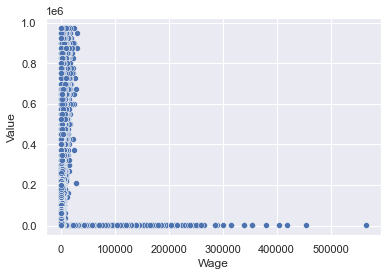

In [42]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph

In [59]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")
])


p = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)